<a href="https://colab.research.google.com/github/heyggun/Data_EDA/blob/main/%ED%98%84%EC%9E%A5%EC%97%90%EC%84%9C_%EB%B0%94%EB%A1%9C_%EC%8D%A8%EB%A8%B9%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_with_%ED%8C%8C%EC%9D%B4%EC%8D%AC_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 현장에서 바로 써먹는 데이터 분석 with 파이썬
### chapter 4. 통계분석과 기본 그래프

p.148 Q. 어제까지 몇 마리의 병아리가 부화했을까? (기초 통계량)

In [1]:
import pandas as pd

In [2]:
import os
os.listdir()

['.config', 'ch4-2.csv', 'ch4-1.csv', 'ch4-3.csv', 'sample_data']

In [3]:
hat = pd.read_csv('ch4-1.csv')
display(hat.head(3))

,hatchery,chick
0,A,30
1,B,30
2,C,29


In [4]:
hat.shape

(7, 2)

In [5]:
hat

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


In [6]:
hat.head(5)

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24


In [7]:
hat.tail(5)

,hatchery,chick
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


In [8]:
# 기초 통계량 구하기
hat['chick'].sum()

194

-> 총 7개의 부화장에 30개씩 총 210개의 달걀을 준비했으나, 그 중 부화한 것은 총 194개

부화율이라는 파생변수(**사용자가 특정 조건이나 함수에 의해 값을 만들어 의미를 부여한 변수**)를 추가해보자

In [9]:
hat['hatch_rate'] = hat['chick']/30 * 100
hat

,hatchery,chick,hatch_rate
0,A,30,100.000000
1,B,30,100.000000
2,C,29,96.666667
3,D,26,86.666667
4,E,24,80.000000
5,F,28,93.333333
6,G,27,90.000000


In [10]:
# 전체 부화율

(hat['chick'].sum())/210 * 100 

92.38095238095238

In [11]:
# 평균 구하기
hat['chick'].mean()

27.714285714285715

-> 약 28마리의 병아리가 부화함

In [12]:
#  표준 편차 구하기
hat['chick'].std()

2.2146697055682827

-> 표준편차 2.21 정도
- 표준편차 : 데이터가 퍼진 정도(매우 중요한 통계 지표 중 하나)

In [13]:
# 중앙값, 최솟값, 최댓값 구하기

print(hat['chick'].median())
print(hat['chick'].min())
print(hat['chick'].max())

28.0
24
30


In [14]:
# 데이터 정렬하기 ('chick' 열을 기준으로)

hat.sort_values(by='chick', ascending=True)

,hatchery,chick,hatch_rate
4,E,24,80.000000
3,D,26,86.666667
6,G,27,90.000000
5,F,28,93.333333
2,C,29,96.666667
0,A,30,100.000000
1,B,30,100.000000


In [15]:
# 막대그래프 그려보기

import matplotlib.pyplot as plt

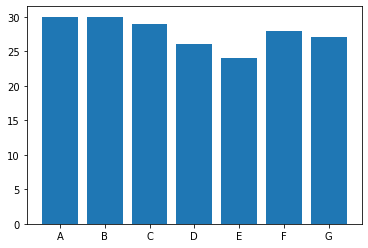

In [16]:
plt.bar(hat['hatchery'], hat['chick'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_

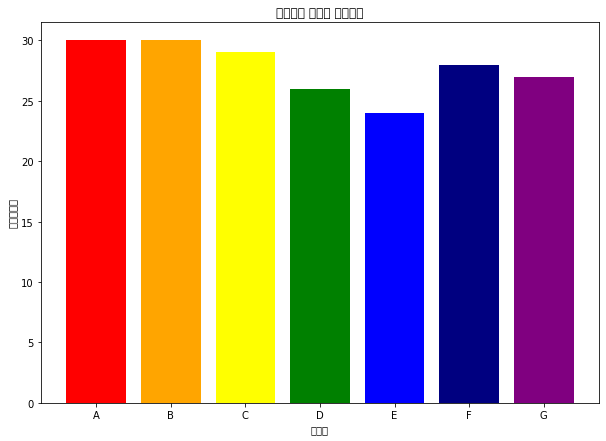

In [17]:
# 막대그래프 다양한 파라미터 추가

plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], 
        color=('red','orange','yellow','green','blue','navy','purple'))
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마리수')
plt.show()

In [18]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

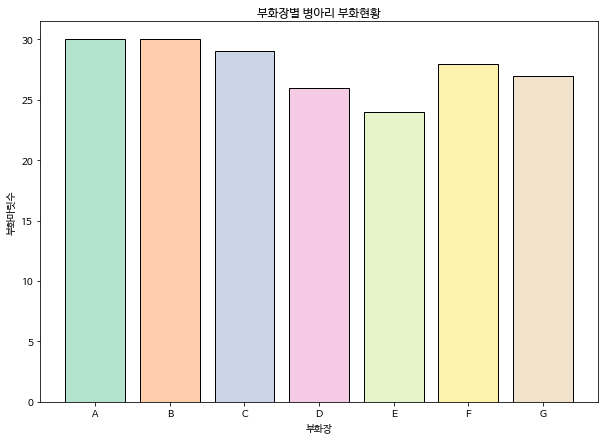

In [20]:
import seaborn as sns
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

- 그래프 위에 텍스트 추가
pyplot 모듈에서 text() 함수사용
-text(x좌표, y좌표, 표시할 텍스트)

In [21]:
# 텍스트 추가 사용자 정의 함수

def addtext(x,y):
  for i in range(len(x)):
    plt.text(i,y[i]+0.5, y[i], ha='center')

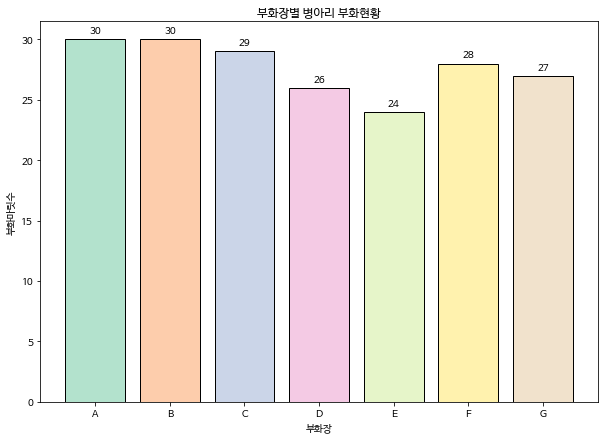

In [22]:
# 막대 위에 텍스트 추가하기

col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
addtext(hat['hatchery'], hat['chick'])
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

+ 그래프 폰트 크기 일괄 조정
- plt.rcParams.update({'font.size':14})

**그래프 위에 선 추가 하기**
- hlines() 함수 사용
- hlines(y좌표값, x좌표 최소값, x좌표 최댓값)

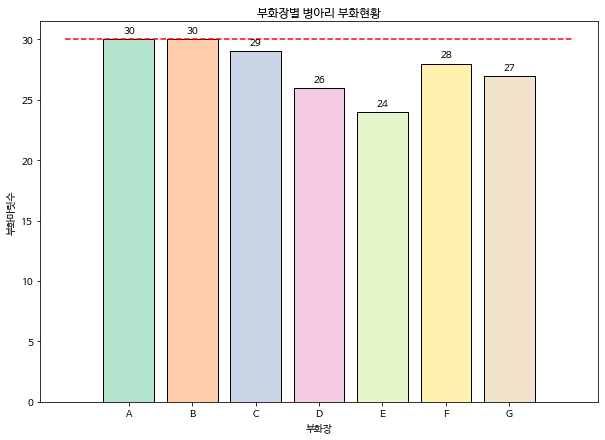

In [23]:
# 그래프 위에 선 추가하기

col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
addtext(hat['hatchery'], hat['chick'])
plt.hlines(30,-1,7, colors='red', linestyles='dashed')
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

-> x 좌표 최솟값과 x 좌표 최댓값은 x좌표가 시작되는 0, x항목이 7개서 끝나는 값은 6임
- 따라서 각각 1만큼씩 여유를 두고, 수평선이 그어질 수 있또록 0보다 1작은 -1, 6보다 1 큰 7로 지정함
- 추가로 수직선을 추가하려면 vlines() 함수

**파이 차트 그려보기**

- 병아리 부화 비율을 pcr 이라는 변수를 만들어 계산
- 부화비율은 각 부화장 별 태어난 병아리 마릿수를 전체 병아리 합으로 나눠준 값으로 정의

In [24]:
pct = hat['chick'] / hat['chick'].sum()
pct

0    0.154639
1    0.154639
2    0.149485
3    0.134021
4    0.123711
5    0.144330
6    0.139175
Name: chick, dtype: float64

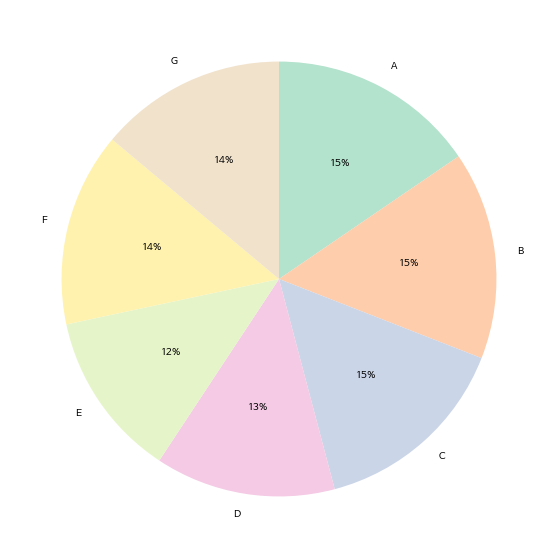

In [25]:
# 파이 차트 그리기 

col7 = sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,10))
plt.pie(pct, labels=hat['hatchery'], autopct='%1.f%%', colors=col7,
        startangle = 90, counterclock = False)
plt.show()

-> 라벨은 부화장 이름인 hat['hatchery']로 지정
- autopct : 비율 표시하는 파라미터 
- startangle : 첫 번째 pie의 시작 각도
- counterclock = False : 라벨 값의 시계 방향 순서대로 영역이 표시 됨
- explode : 파이 조각이 중심에서 벗어나는 정도

p.165 Q. 부화한 병아리들의 몸무게는 얼마일까?
(정규분포와 중심극한정리)

In [26]:
b = pd.read_csv('ch4-2.csv')
display(b.head())

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [27]:
# 데이터 구조와 유형 확인
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


- 30 entries : 30 개의 관측치를 가지고 있음
- total 2 columns :  변수(feature)가 2개
- 각 변수별로 변수명, non_null 개수, 데이터 타입 표시 

In [28]:
# 통계량으로 분포 확인하기
b.describe()

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


- 표준 편차가 3.286335

- pandas 패키지에서 std()는 표본 표준편차를 기본값으로 계산
- numpy 패키지에서 std() 함수는 모 표준편차를 기본값으로 계싼
- 두 함수 모두 ddof 파라미터를 적용할 수 있는데 이 값을 0으로 지정하면 모 표준편차, 1로 지정하면 표본 표준편차가 됨

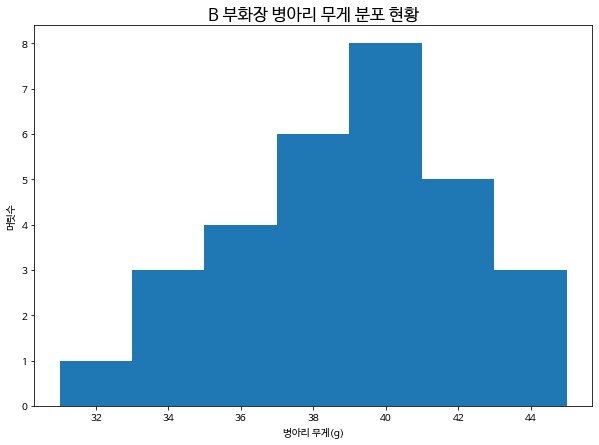

In [29]:
# 히스토그램으로분포 확인하기

plt.figure(figsize=(10,7))
plt.hist(b['weight'], bins=7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize=17)
plt.xlabel('병아리 무게(g)')
plt.ylabel('머릿수')
plt.show()

히스토그램(histogram)
- 가로축 : 병아리 무게(측정값), 구간(계급)
- 세로축 : 마릿수(도수, 데이터 개수)
- 도수 분포 상태를 막대 모향 그래프로 나타낸 것
- 히스토그램 -> 데이터의 분포를 확인함
- 정규분포(Normal Distribution)의 모양
- 정규분포는 평균과 표준편차에 의해 모양이 결정되는 연속확률분포임

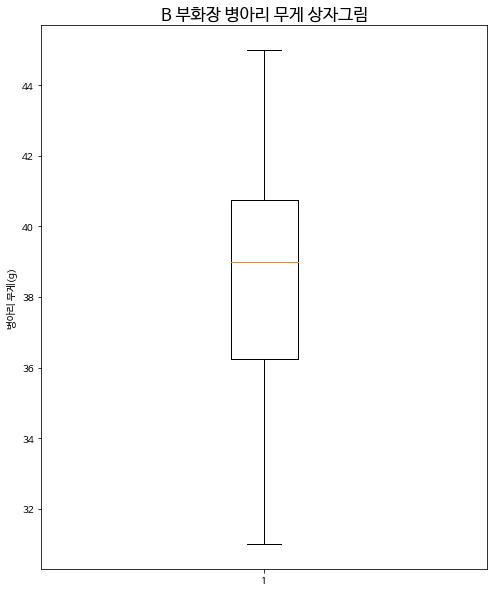

In [30]:
# 상자그림으로 분포 확인하기

plt.figure(figsize=(8,10))
plt.boxplot(b['weight'])
plt.title('B 부화장 병아리 무게 상자그림', fontsize=17)
plt.ylabel('병아리 무게(g)')
plt.show()

- 세로축: 병아리 무게(측정값)
- 상자료 포시된 부분 : 중앙값(상자 가운데선 50%)
- 중앙값을 기준으로 각각 25% 총 50% 가 포함되는 범위인 IQR(Inter Quantile Range)를 나타냄
- 상자그림은 전체 데이터를 4등분해 데이터의 분포를 간략하게 파악함
- 서로 다른 2개 이상의 집단 간 데이터 분포를 비교할 때 주로 사용됨

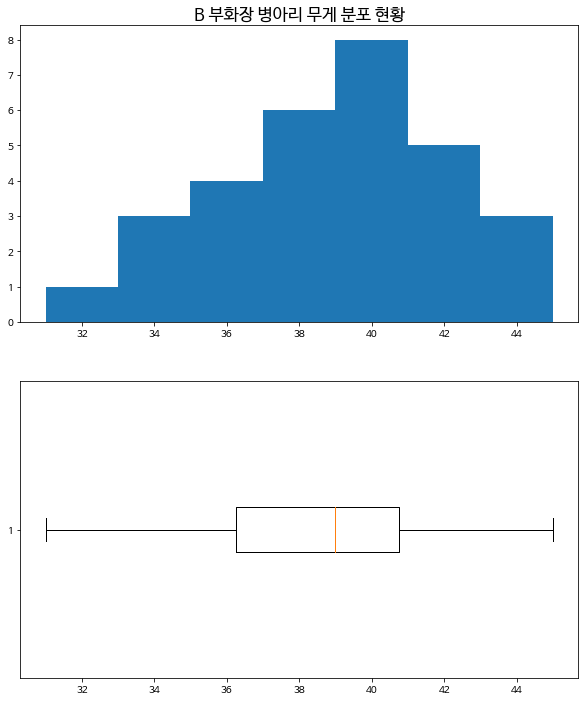

In [31]:
# 다중 그래프로 분포 확인하기 

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.hist(b['weight'], bins=7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize=17)
plt.subplot(2,1,2)
plt.boxplot(b['weight'], vert=False)
plt.show()

- 중심극한정리를 이용해 병아리 몸무게의 평균과 표준편차만으로 대략적인 분포 구해보기
- 위의 계산 결과에 따르면 병아리 몸무게 평균은 38.4, 표준편차는 3.286335 임

- 추정
  - (1) 최솟값 평균-3*표준편차
  - (2) 1사분위수 평균 - 0.6745 * 표준편차
  - (3) 3사분위수 평균 + 0.6745 * 표준편차
  - (4) 최댓값 평균 + 3*표준편차

In [32]:
hatch_mean = b['weight'].mean()
print(hatch_mean)

hatch_std = b['weight'].std()
print(hatch_std)

38.4
3.286335345030997


In [33]:
 # 추정값
 esti_min = hatch_mean - 3*hatch_std
 esti_1qr = hatch_mean - 0.6745*hatch_std
 esti_3qr = hatch_mean + 0.6745*hatch_std
 esti_max = hatch_mean + 3*hatch_std

 print(esti_min)
 print(esti_1qr)
 print(esti_3qr)
 print(esti_max)

28.54099396490701
36.183366809776594
40.6166331902234
48.25900603509299


- 히스토그램과 상자그림을 통해 병아리 몸무게가 어느 정도 인지 확인한 결과, 30마리의 체중이 30g~45g 사이에 위치하며 그 중 절반은 36.25g(1사분위수), 40.75(3사분위수) 사이에 분포하고 있음을 알 수 있음
- 중심극한정리를 통해 평균과 표준편차만으로 대략적인 몸무게의 분포를 추정할 수 있음

p.176 Q. 사료 제조사별 성능 차이가 있을까? (가설 검정)

- 병아리가 부화한 지 5일이 지났음
- 부화장 A에서 태어난 병아리 대비 부화장 B에서 태어난 병아리의 덩치가 더 작아보임
- 서로 다른 사료를 먹이고 있으나 기분 탓인지, 아니면 정말 작은지 검정해봄

In [34]:
test = pd.read_csv('ch4-3.csv')
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


- 부화장 A와 B 각각에서 태어난 30마리의 병아리 중에서 10마리씩 샘플링한 몸무게 데이터

In [35]:
test.columns

Index(['hatchery', 'chick_nm', 'weight'], dtype='object')

In [36]:
# 상자그림으로 분포 비교하기
 
plt.figure(figsize=(10,7))
sns.boxplot(x='weight', y='hatchery', date=test)
plt.tile('부화장 A vs. B 몸무게 분포 비교', fontsize=17)
plt.show()

ValueError: ignored

<Figure size 720x504 with 0 Axes>

**정규분포 인지 검정하기**
- 두 집단 간 몸무게 평균이 같은지 다른지 가설검정의 방법론인 t-test를 통해 진행
- t-test는 데이터가 정규분포를 이룬다는 가정하에 평균이 데이터의 대푯값 역할을 한다고 전제함
- t-test를 수행하기 전에 데이터가 정규분포를 따르는지 샤피로-윌크 검정을 통해 판정
- 샤피로-윌크 검정은 scipy 패키지

In [38]:
# 정규분포 인지 검정하기

import scipy as sp

#부화장 A만 별도로
test_a = test.loc[test['hatchery']=='A', 'weight']
#부화장 B만 별도로
test_b = test.loc[test['hatchery']=='B', 'weight']

#부화장 A 샤피로-윌크 검정
print(sp.stats.shapiro(test_a))


#부화장 B 샤피로-윌크 검정
print(sp.stats.shapiro(test_b)) 


ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530338883399963)
ShapiroResult(statistic=0.9390685558319092, pvalue=0.5426967740058899)


- 귀무가설 : 정규분포임
- 대립가설 : 정규분포 아님

p_value가 0.553, 0.541로 둘다 신뢰수준을 95%로 설정할 때 유의수준인 0.05보다 크기 때문에 귀무가설을 채택함 -> 즉 둘 다 정규 분포임

**t-test로 두 집단 간 평균 검정**

In [40]:
# t-test를 통해 부화장 A,B 병아리 몸무게가 다른지 같은지 검정

print(sp.stats.ttest_ind(test_a, test_b))


Ttest_indResult(statistic=2.842528280230058, pvalue=0.010803990633924202)


-> ttet_ind() 이용해 부화장별 모뭄게의 평균이 같은지/다른지 확인
- p-value값이 0.0108로 0.05보다 작음. 95% 신뢰수준에서 대립가설을 채택함
: 즉, 부화장 A와 B의 병아리 몸무게 평균은 서로 다르다고 판단함(신뢰수준을 99%로 설정했다면 p-value가 0.01보다 크기 때문에 귀무가설을 채택함)

고로, 부화장 B의 병아리들이 부화장의 A의 병아리보다 덩치가 작다고 할 수 있음. 유의수준 95%에서

### chapter 5. 상관분석과 회귀분석

p.198 Q.병아리 성장에 영향을 미치는 인자는 무엇일까? (상관분석)

- 상관분석(Correlation Analysis)은 연속형인 두 변수 간에 어떤 선형적인(linear) 또는 비선형적인(non-linear) 관계를 가지고 있는지 분석하는 방법
- 상관분석을 실시하면 두 변수 간의 관계를 상관계수(Correlation Coeffiecient)로 나타냄
- 상관계수는 -1과 1 사이의 값을 가지며 (-) 부호일 경우 반비례, (+) 부호일 경우 비례인 양의 상관관계를 나타냄 
- 상관관계의 경우 두 변수간의 연관된 정도만을 나타낼 뿐, 인과 관계를 설명하는 것은 아님

In [41]:
w = pd.read_csv('ch5-1.csv')
display(w.head(3))

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13


In [42]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


- 병아리 몸무게(weigth), 종란 무게(egg_weight), 하루 평균 이동 거리(movemont), 하루 평균 사료 섭취량(food) 데이터

In [43]:
w_n = w.iloc[:,1:5]
w_n.head(5)

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [45]:
w_cor = w_n.corr(method='pearson')
w_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


->  상관행렬(Correlation Matrix) 
- 병아리의 몸무게 (weight) 와 다른 변수간의 관계를 봤을 때, 종란 무게(egg_weight) 0.9571 거의 1에 가까운 양의 상관관계임
- 하루 평균 사료 섭취량(food)도 0.877 양의 상관
- 하루 평균 이동 거리(movement) 0.3807 어느 정도 양의 상관관계 존재

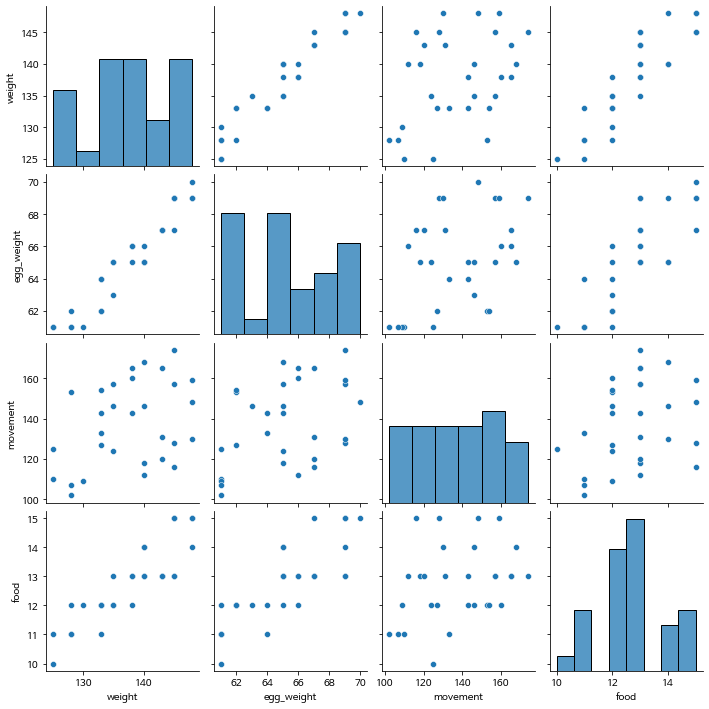

In [46]:
# 상관분석 결과 표현하기

sns.pairplot(w_n)

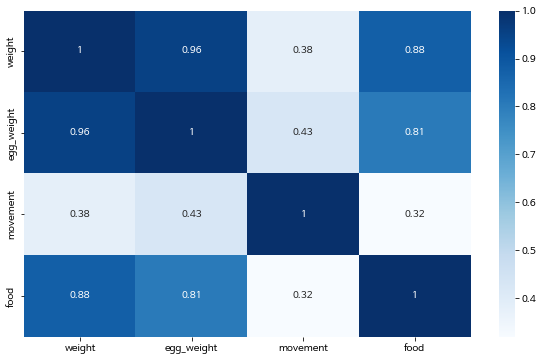

In [47]:
# 상관행렬도 
plt.figure(figsize=(10,6))
sns.heatmap(w_cor, annot=True, cmap='Blues')
plt.show()

p.196 Q. 병아리의 몸무게를 예측할 수 있을까?(회귀 분석)

- 상관분석을 통해 병아리 몸무게가 영향을 미치는 인자들을 찾을 수 있었고, 그 중에서도 병아리가 태어난 달걀인 종란 무게가 가장 큰 양의 상관관계를 갖고 있음을 확인할 수 있음
- 종란 무게로 병아리 몸무게 예측해보기

**회귀분석**
- 연속형 변수들에 대해 두 변수 간의 관계를 수식으로 나타내는 분석 방법
- x라는 독립변수와 y라는 종속변수가 존재할 때 y=a*x_b과 같은 형태의 수식으로 나타낼 수 있는 방법

- 직선과 개별 값들 간의 오차를 최소화 하는 직선을 찾는 것이 목표
- 종속변수가 1개, 독립 변수가 2개 이상이면 다중 회귀분석
- 종속변수와 독립변수 간의 관계가 log나 거듭제곱과 같은 비선형 관계일 수록 비선형 회귀분석이라고 함

**단순 선형 회귀분석**

- 종속변수(y)와 독립변수(x)가 각각 하나씩 존재, 서로 선형적인 관계를 가질 때 사용하는 방법
- y= a*x+b
- 상관분석에서 병아리 몸무게에 종란 무게가 가장 큰 상관관계를 가지고 있었으므로 병아리 몸무게(y)를 종란 무게(x)로 수식화 

In [49]:
# 단순 선형 회귀분석 

# 회귀 분석을 위한 모듈 불러오기
import statsmodels.formula.api as smf

model_lm = smf.ols(formula='weight~egg_weight', data=w_n)

#모델 학습
result_lm = model_lm.fit()

result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.32e-16
Time:                        15:01:37   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 첫 번째로 회귀 모델이 통계적으로 유의한가?
Prob(F-statistic) 1.32e-16 : F 통계량의 p-value 값이 0.05보다 작으면 유의수준 5%(신뢰수준 95%) 하에서 추정된 회귀모델이 통계적으로 유의한 것으로 판단함. 1.32 x 10-16이라서 0.05보다 매우 작으므로 회귀 모델이 통계적으로 유의하다고 판단함
- 두 번쨰로, 개별 독립변수가 통계적으로 유의한지 확인
egg_weight의 P>|t|가 0.000 으로 0.05보다 작아서 유의함 
- 결정계수 확인. R^2은 1에 가까울수록 회귀모델의 성능(설명력)이 뛰어남 . 일반적으로 R^2이 0.7보다 크면 꽤 우수한 회귀모델이라고 판단함. R-squared 0.916로 회귀모델 성능이 뛰어나다고 할 수 있음
- 회귀모델은 coef 값으로 구할 수 있음
Intercept는 y절편(상수)을 뜻하고, 각 독립 변수에 해당하는 coef 값은 독립 변수의 계수(기울기)를 나타냄

weight = 2.3371 * egg_weight -14.5474로 회귀모델을 수식화 할 수 있음

In [50]:
print(result_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.32e-16
Time:                        15:06:37   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.1